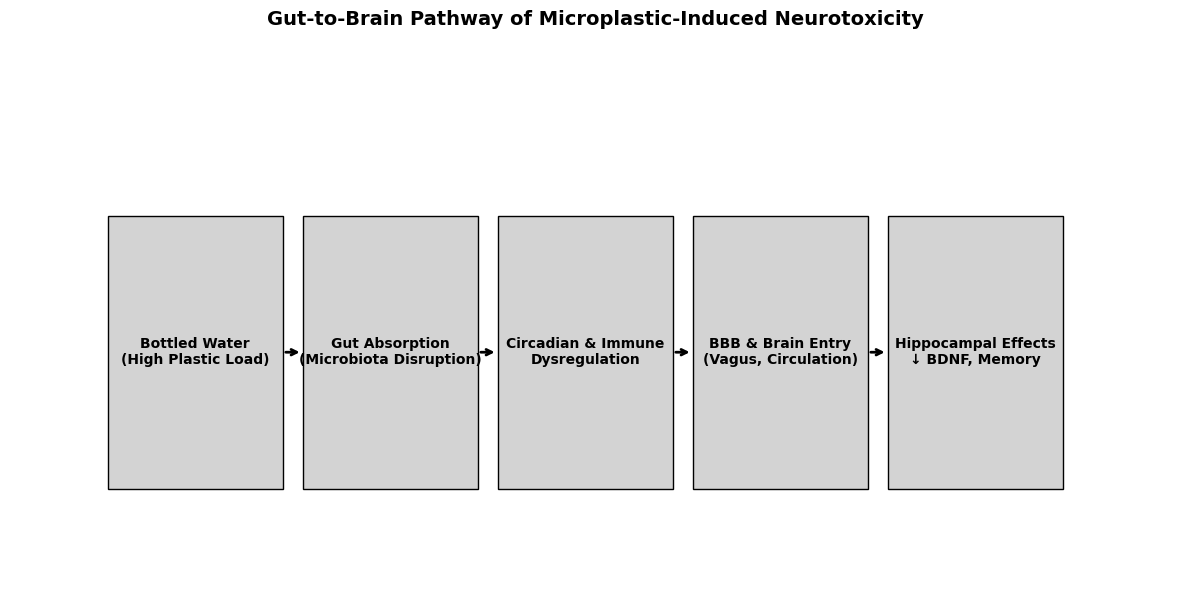

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# PART 1: GUT-TO-BRAIN DIAGRAM
# ----------------------------

def draw_microplastic_pathway():
    """
    Draws a flowchart of how microplastics travel from bottled water → gut → brain.
    Illustrates microbiota disruption, circadian interference, and BDNF suppression.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')  # Hide axis lines and ticks for clean visual

    # List of major biological checkpoints from ingestion to neurotoxicity
    stages = [
        "Bottled Water\n(High Plastic Load)",
        "Gut Absorption\n(Microbiota Disruption)",
        "Circadian & Immune\nDysregulation",
        "BBB & Brain Entry\n(Vagus, Circulation)",
        "Hippocampal Effects\n↓ BDNF, Memory"
    ]

    # X-axis positions for each box
    box_positions = [1, 3, 5, 7, 9]

    # Draw rectangles and stage text
    for x, text in zip(box_positions, stages):
        ax.add_patch(plt.Rectangle((x, 2.5), 1.8, 1.5, edgecolor='black', facecolor='lightgray'))
        ax.text(x + 0.9, 3.25, text, ha='center', va='center', fontsize=10, weight='bold')

    # Connect boxes with arrows
    for i in range(len(box_positions) - 1):
        ax.annotate('', xy=(box_positions[i+1], 3.25), xytext=(box_positions[i]+1.8, 3.25),
                    arrowprops=dict(arrowstyle='->', lw=2))

    # Layout and title
    ax.set_xlim(0, 12)
    ax.set_ylim(2, 5)
    ax.set_title("Gut-to-Brain Pathway of Microplastic-Induced Neurotoxicity", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

# ---------------------
# RUN THE VISUALIZATION
# ---------------------

# 1. Show gut-to-brain pathway
draw_microplastic_pathway()


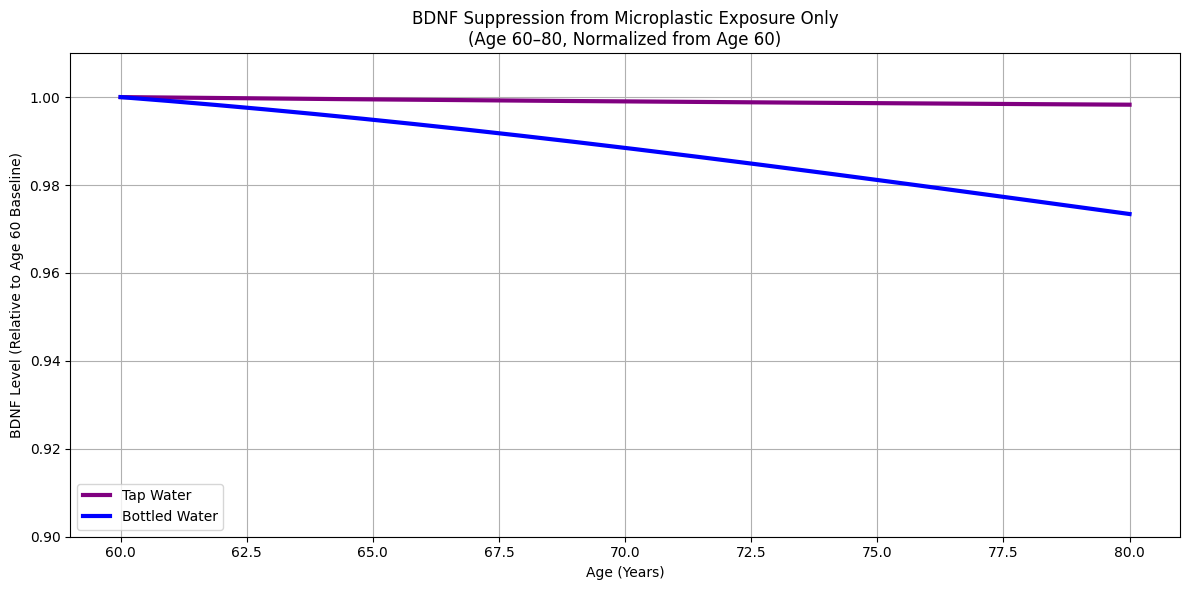

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- BDNF Simulation from Microplastic Exposure (No Aging Curve) ---

def simulate_plastic_bdnf_curve(daily_particles, suppression_strength):
    """
    Simulates the decline of BDNF levels due to plastic exposure alone.
    Assumes BDNF is 1.0 at age 60 and declines only due to microplastic accumulation.

    Parameters:
    - daily_particles (float): Daily microplastic intake (e.g., 110 or 883 particles/day)
    - suppression_strength (float): Max proportion of BDNF that can be suppressed (e.g., 0.25 = 25%)

    Returns:
    - ages: Array of ages from 60 to 80
    - bdnf: Array of BDNF levels over time (starting at 1.0)
    """
    # Simulate from age 60 to 80 (20 years)
    start_age = 60
    end_age = 80
    total_days = (end_age - start_age) * 365
    days = np.arange(total_days + 1)
    ages = days / 365 + start_age

    # Step 1: Accumulate retained microplastics with clearance
    clearance_rate = 0.0001  # 0.01% of load is cleared per day
    retained_particles = np.zeros_like(days, dtype=float)
    for i in range(1, len(days)):
        retained_particles[i] = retained_particles[i - 1] * (1 - clearance_rate) + daily_particles

    # Step 2: Compute sigmoid-based suppression from retained load
    midpoint_particles = 1e7  # midpoint where suppression = 50%
    slope = 3e6               # controls steepness of sigmoid
    raw_suppression = 1 / (1 + np.exp(-(retained_particles - midpoint_particles) / slope))

    # Step 3: Normalize so age 60 = 0 suppression (starts at BDNF = 1.0)
    suppression = raw_suppression - raw_suppression[0]
    plastic_impact = suppression_strength * suppression

    # Step 4: Final BDNF = 1.0 - impact from plastic
    bdnf = np.clip(1.0 - plastic_impact, 0, 1)

    return ages, bdnf


# --- PLOT RESULTS ---

plt.figure(figsize=(12, 6))

# Plot for Tap Water (~110 particles/day)
ages_tap, bdnf_tap = simulate_plastic_bdnf_curve(110, suppression_strength=0.25)
plt.plot(ages_tap, bdnf_tap, label='Tap Water', color='purple', linewidth=3)

# Plot for Bottled Water (~883 particles/day)
ages_bottled, bdnf_bottled = simulate_plastic_bdnf_curve(883, suppression_strength=0.25)
plt.plot(ages_bottled, bdnf_bottled, label='Bottled Water', color='blue', linewidth=3)

# Plot formatting
plt.title("BDNF Suppression from Microplastic Exposure Only\n(Age 60–80, Normalized from Age 60)")
plt.xlabel("Age (Years)")
plt.ylabel("BDNF Level (Relative to Age 60 Baseline)")
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
